Using the Wine dataset in Sklearn we are going to work with clustering & linear regression

Information about dataset:
Dataset contains 3 categories of wine (from 3 different manufactures/growers), and 13 measurements for each wine – with a total of 178 wines.

Dataset:
”from sklearn.datasets import load_wine”
“wine = load_wine()”

Exercises:
1.	Try to identify clusters in the dataset.
2.	Measure how your clustering algorithm performs
(Hint: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)
3.	Analyze if there is any linear relationship between features 
(e.g Is there any relation to Magnesium and Target category?)
Note. There is no right or wrong to this one – just analyze the data and see if you find any correlations.


[2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 1 1 1 2 2 1 2 2 2 1 2 2 1 1
 2 1 1 1 2 2 0 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0]


 [0 1 2]
0      2.0
1      2.0
2      2.0
3      2.0
4      0.0
      ... 
173    0.0
174    1.0
175    1.0
176    1.0
177    0.0
Name: cluster_group, Length: 178, dtype: float64
1.0


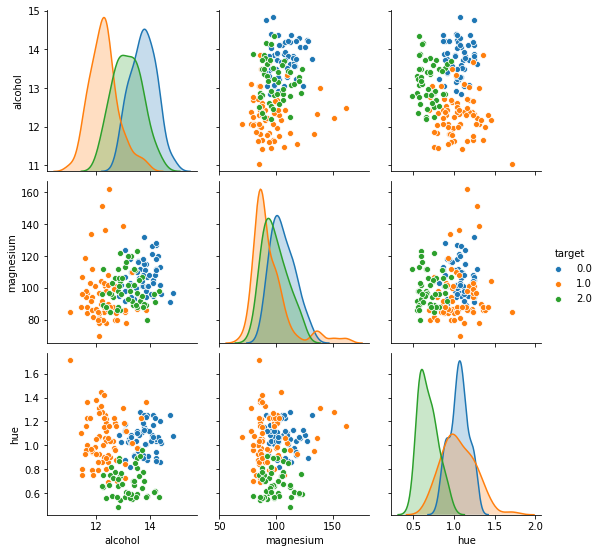

In [26]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns


wine = load_wine()
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
#1
bw = estimate_bandwidth(data)
analyzer = MeanShift(bandwidth=bw) 
analyzer.fit(data)
labels = analyzer.labels_
print(labels)
print('\n\n',np.unique(labels))
#I have found 3 clusters

#2
data['cluster_group'] = np.nan
for i in range(len(data)):
    data.iloc[i,data.columns.get_loc('cluster_group')] = labels[i]
    
print(data.cluster_group)
labels_true = data.cluster_group

labels_pred = [2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]

print(metrics.adjusted_rand_score(labels_true, labels_pred))
#Rand score is 1.0

#3
plotter = data[['alcohol','magnesium','hue', 'target']]
plotter.corr()
sns.pairplot(plotter, hue='target')


#data.head()